# Least Squares Estimation for Non-linear Systems

## Linearization Process

For most of the real-world estimation problems we have a non-linear behaviour relating observations $\mathbf{y}$ and unknowns $\mathbf{x}$. In this case, the relationship between them can be expressed as

#### $$  \textbf{y}=\textbf{h}(\textbf{x})+ \textbf{e}$$

, where $\textbf{y}$ is the vector containing the $m$ measurements,  $\textbf{h}(\textbf{x})$ is a generic non-linear function of the $n$ dimensional state vector $\textbf{x}$ and $\textbf{e}$ is the $m$ dimensional error vector.

In Chapter 06 we discussed how we can derive an estimate of the unknowns states by implementing the normal equation

#### $$ \hat{\textbf{x}}=\left ( \textbf{H}^T \textbf{H} \right )^{-1} \textbf{H}^T \textbf{y} $$

Solving this equation allows us to find the *residuals*, i.e. the difference between the measured values and the modeled values:

#### $$ \Delta \textbf{y} = \textbf{y} - \textbf{h}(\hat{\textbf{x}})$$

Now assume that we have a set of apriori, first guess estimates of the unknowns $\textbf{x}$ which we define as *current*:

#### $$\mathbf{x}_{c}=\left [ x_{1c}, x_{2c}, ..., x_{nc} \right ]$$



Whatever the (still unknown) best estimate of the state $\hat{\textbf{x}}$ is, we can relate this quantity with our first guess by using a set of (unknown) corrections $\Delta{\textbf{x}}$:

#### $$ \hat{\textbf{x}}= \mathbf{x}_{c} + \Delta{\textbf{x}}$$

If the components of $\Delta{\textbf{x}}$ are sufficiently small (so, if the first guess of the unknown state vector is close to its actual value), it may be possible to solve for them and thereby update $\mathbf{x}_c$ with an improved estimate. Under this assumption we can linearize $\textbf{h}(\textbf{x}_i)$ around $\mathbf{x}_c$ using a first-order Taylor series expansion as

#### $$ \textbf{h}(\hat{\textbf{x}})  \approx \textbf{h}(\mathbf{x}_{c}) + \textbf{H} \Delta \textbf{x}$$

, where 

### $$ \textbf{H} = \left.\begin{matrix}\frac{\partial}{\partial \mathbf{x}} \mathbf{h}\end{matrix}\right|_{\mathbf{x}_{c}}$$

is a known as the **Jacobian** matrix and is composed by the partial derivatives of the non-linear function $\textbf{h}(\textbf{x}_i)$ respect to the state vector, evaluated for the current estimate. The above equation now is linear respect to $\Delta \textbf{x}$.

The normal equation for the linearized system is written as:

### $$ \Delta \mathbf{x}= \left (\mathbf{H}^T\mathbf{W}\mathbf{H}  \right )^{-1}\mathbf{H}^T\mathbf{W}\Delta \mathbf{y} $$


By iterating this process (assuming that our initial guess is sufficiently close to the state to estimate) we'll converge to the solution $\hat{\textbf{x}}$.

 Here below is shown the flowchart of the non-linear least square process:

<center><img src="Images/nonlinearLS.png" alt="Drawing" style="width: 800px;"/><center>


### Example: Falling Body with Range Traking

The follwing examples shows how to estimate the initial position $x_0,  y_0$ of a falling body using the following dynamical model (air drag is not considered):

#### $$ x(t)= x_0 \quad y(t) = y_0 - 0.5 g t^2$$

<center><img src="Images/freeFallLs.png" alt="Drawing" style="width: 600px;"/><center>

A sensor is placed at the origin of the reference system, being able to measure the range to the falling body every 0.05 sec. for 3 sec., collecting 61 measurements in total. The (non-linear) model which relates the measurement with the unknowns is

#### $$ \rho(t) = \sqrt{x(t)^2 + y(t)^2} = \sqrt{x_0^2 + (y_0-0.5gt^2)^2}$$

Following the approach explained above, we can linearize this non-linear relationship nearby a reference solution, which is generally estimated apriori. The Jacobian matrix in this case is a 61x2 matrix, being 61 the number of measurements and 2 the dimension of the unknowns. Each row of the Jacobian is composed as follows

### $$ H =\begin{bmatrix}
\frac{\partial \rho}{\partial x_0} & 
\frac{\partial \rho}{\partial y_0} 
\end{bmatrix} = \begin{bmatrix}
\frac{x_0}{\sqrt{x_0^2+(y_0-0.5gt^2)}}& 
\frac{y_0-0.5gt^2}{\sqrt{x_0^2+(y_0-0.5gt^2)}}\end{bmatrix}$$

, where  $x_0,  y_0$ is the apriori estimate and $t$ is the measurement epoch.

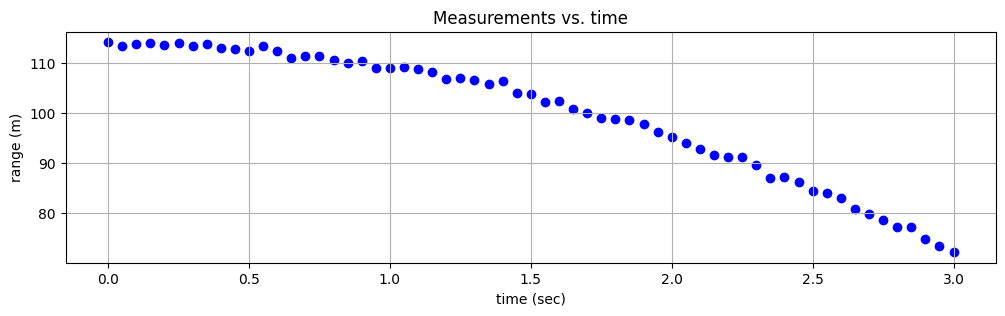

---------- Initial guess  ----------
Estimated xO = 20 m (true value is 30 m)
Estimated yO = 100 m (true value is 110 m)
Cost function value = 75.25197330955432
 
----------- Iteration 1 ------------
Estimated xO = 30.04910520185917 m
Estimated yO = 110.19290499411166 m
x0 standard deviation = 3.051685885325721 m
y0 standard deviation = 0.7461590535283712 m/sec
Cost function value   = 0.16311711937330806
 
----------- Iteration 2 ------------
Estimated xO = 30.03861309533527 m
Estimated yO = 109.90917623986286 m
x0 standard deviation = 2.6817013103095944 m
y0 standard deviation = 0.8702101657708303 m/sec
Cost function value   = 0.12583215907332082
 
----------- Iteration 3 ------------
Estimated xO = 30.03790986728695 m
Estimated yO = 109.90936948996891 m
x0 standard deviation = 2.6662090711696167 m
y0 standard deviation = 0.8676049506883305 m/sec
Cost function value   = 0.12583215801590455
 


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics

##### measurements set definition ##########
nMeasurements = 61
sigma = 0.5 # m
# define the observations times
times = np.linspace(0, 3, nMeasurements)

####### dynamic model of the system ########
# state vector X = [x, y]
x0 = 30   # m
y0 = 110  # m
xTrue = x0 + 0 * times
yTrue = y0 - 0.5 * 9.8 * times * times


# simulate measurements
yMeas = np.zeros(nMeasurements)
for i in range (0, nMeasurements):
 yMeas[i] = math.sqrt(xTrue[i] * xTrue[i] + yTrue[i] * yTrue[i]) + sigma * np.random.randn()
    
# plot the measurements values over time
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.xlabel("time (sec)")
plt.ylabel("range (m)")
ax.scatter(times, yMeas, color = 'blue')
ax.set(title = 'Measurements vs. time')
ax.grid()
plt.show()

########## first state estimate ##########
Xc = [20, 100]

# calculate residuals relative to the first state estimate
deltaYc = np.zeros(nMeasurements)
for i in range (0, nMeasurements):
 deltaYc[i] = yMeas[i] - math.sqrt(math.pow(Xc[0], 2) + math.pow(Xc[1] - 0.5 * 9.8 * times[i] * times[i], 2))

#evaluate the cost function relative to the first state estimate
J = (1 / (2 * nMeasurements)) * deltaYc.T.dot(deltaYc)
print('---------- Initial guess  ----------')
print('Estimated xO = ' + str(Xc[0]) + ' m (true value is ' + str(x0) + ' m)')
print('Estimated yO = ' + str(Xc[1]) + ' m (true value is ' + str(y0) + ' m)')
print('Cost function value = ' + str(J))
print(' ')

########## iterate over successive estimates ##########
J_old = 10000
iteration = 1
while math.fabs(J_old - J) > 0.01:
 # define the structure of the Jacobian H matrix
 H = np.zeros([nMeasurements, len(Xc)])
 # calculate the partial derivatives and fill the H  matrix
 for i in range (0, nMeasurements):
  den = math.sqrt(math.pow(Xc[0], 2) + math.pow(Xc[1] - 0.5 * 9.8 * times[i] * times[i], 2))
  dhdx_i  = Xc[0] / den
  dhdy_i  = (Xc[1] - 0.5 * 9.8 * times[i] * times[i]) / den
  H[i] = np.array([dhdx_i, dhdy_i])

 # implement the normal equation
 P = np.linalg.inv(H.T.dot(H))
 F = P.dot(H.T).dot(deltaYc)
 # get the state uncertainties
 sigmaX = math.sqrt(P[0, 0])
 sigmaY = math.sqrt(P[1, 1])
 # find the new Xc
 Xc = Xc + F

 # find the new residuals
 for i in range(0, nMeasurements):
  deltaYc[i] = yMeas[i] - math.sqrt(math.pow(Xc[0], 2) + math.pow(Xc[1] - 0.5 * 9.8 * times[i] * times[i], 2))
 # re-evaluate the cost function
 J_old = J
 J = (1 / (2 * nMeasurements)) * deltaYc.T.dot(deltaYc)

 print('----------- Iteration ' + str(iteration)  + ' ------------')
 print('Estimated xO = ' + str(Xc[0]) + ' m')
 print('Estimated yO = ' + str(Xc[1]) + ' m')
 print('x0 standard deviation = ' + str(sigmaX) + ' m')
 print('y0 standard deviation = ' + str(sigmaY) + ' m/sec')
 print('Cost function value   = ' + str(J))
 print(' ')
 iteration += 1

